In [145]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv


In [146]:
train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
sample_submission = pd.read_csv('/kaggle/input/home-credit-default-risk/sample_submission.csv')
bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
prev_apps = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv')

In [147]:
pos_cash = pd.read_csv('/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/credit_card_balance.csv')

In [148]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000

In [149]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [110]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [111]:
train.shape, test.shape

((307511, 122), (48744, 121))

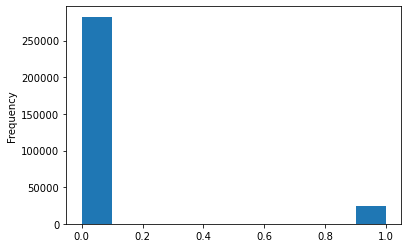

In [112]:
train['TARGET'].astype(int).plot.hist();

In [150]:
mis_val = train.isnull().sum()
mis_val_percent = 100 * train.isnull().sum() / len(train)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=True).round(1)

mis_val_table_ren_columns
        

,Missing Values,% of Total Values
DAYS_LAST_PHONE_CHANGE,1,0.0
CNT_FAM_MEMBERS,2,0.0
AMT_ANNUITY,12,0.0
AMT_GOODS_PRICE,278,0.1
EXT_SOURCE_2,660,0.2
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
NAME_TYPE_SUITE,1292,0.4


In [114]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [115]:
train.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


We can encode categorical variables with 2 distinct values via lablel encoding (1 and 0), while other will be encoded via OneHot (although some variables like NAME_EDUCATION_TYPE seem to be ordinal, we will still use OneHot). 

However, before doing this, we should merge to datasets to ensure that we encode all possible categories.

In [151]:
target = train.pop('TARGET')
target.head()


0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [152]:
data = pd.concat([train, test], keys = ['train', 'test'])
data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
train 0      100002         Cash loans           M            N   
      1      100003         Cash loans           F            N   
      2      100004    Revolving loans           M            Y   
      3      100006         Cash loans           F            N   
      4      100007         Cash loans           M            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
train 0               Y             0          202500.0    406597.5   
      1               N             0          270000.0   1293502.5   
      2               Y             0           67500.0    135000.0   
      3               Y             0          135000.0    312682.5   
      4               Y             0          121500.0    513000.0   

         AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
train 0      24700.5         351000.0   Unaccompanied          Working   
      1      35698.5        1129500.0          Family    State servant   
      2       6750.0         135000.0   Unaccompanied          Working   
      3      29686.5         297000.0   Unaccompanied          Working   
      4      21865.5         513000.0   Unaccompanied          Working   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
train 0  Secondary / secondary special  Single / not married   
      1               Higher education               Married   
      2  Secondary / secondary special  Single / not married   
      3  Secondary / secondary special        Civil marriage   
      4  Secondary / secondary special  Single / not married   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
train 0  House / apartment                    0.018801       -9461   
      1  House / apartment                    0.003541      -16765   
      2  House / apartment                    0.010032      -19046   
      3  House / apartment                    0.008019      -19005   
      4  House / apartment                    0.028663      -19932   

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
train 0           -637            -3648.0            -2120          NaN   
      1          -1188            -1186.0             -291          NaN   
      2           -225            -4260.0            -2531         26.0   
      3          -3039            -9833.0            -2437          NaN   
      4          -3038            -4311.0            -3458          NaN   

         FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
train 0           1               1                0                 1   
      1           1               1                0                 1   
      2           1               1                1                 1   
      3           1               1                0                 1   
      4           1               1                0                 1   

         FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
train 0           1           0        Laborers              1.0   
      1           1           0      Core staff              2.0   
      2           1           0        Laborers              1.0   
      3           0           0        Laborers              2.0   
      4           0           0      Core staff              1.0   

         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
train 0                     2                            2   
      1                     1                            1   
      2                     2                            2   
      3                     2                            2   
      4                     2                            2   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
train 0                  WEDNESDAY                       10   
      1                     MONDAY                       11   
      2                     MONDAY                        9  

In [153]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [154]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


Now let's create dummies for other categorical variables using pandas.get_dummies

In [155]:
print(data.shape)
data = pd.get_dummies(data)
print(data.shape)

(356255, 121)
(356255, 242)


In [156]:
train = data.loc['train',:]
print(train.shape)
test = data.loc['test',:]
print(test.shape)

(307511, 242)
(48744, 242)


In [157]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

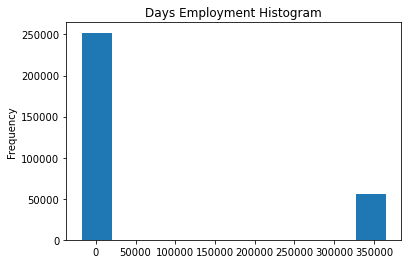

In [158]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')

Let's change this strange 365243 value to NaN and create an additional dummy variable.

In [159]:
train.loc[:,'DAYS_EMPLOYED_ANOM'] = ((train["DAYS_EMPLOYED"] == 365243).apply(int)).to_numpy()
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
sum(train['DAYS_EMPLOYED_ANOM'])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

55374

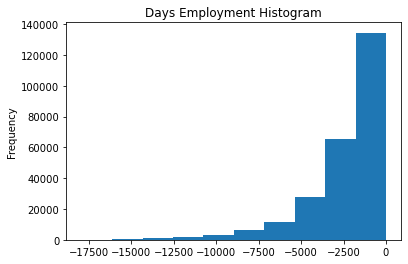

In [160]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')

In [161]:
test['DAYS_EMPLOYED_ANOM'] = (test["DAYS_EMPLOYED"] == 365243).apply(int)
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [162]:
sum(test['DAYS_EMPLOYED_ANOM'])

9274

Now let's deal with missing data + perform normalizing

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

train_copy = train.copy()
features = list(train.columns)
test_copy = test.copy()

train.pop('SK_ID_CURR')
test.pop('SK_ID_CURR')
# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [25]:
train_copy.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: typ

Now we can create our first prediction, based purely on factors included in train/test datasets.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(train)

from sklearn.metrics import roc_auc_score

print(kf)
model = LogisticRegression(penalty = 'l1', solver = 'saga')
roc_auc_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train[train_index,:], train[test_index,:]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(X_train, y_train)
    #print("model.coef_: ", model.coef_)
    predict = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("Mean Roc-Auc for 10-fold: {}".format(str(np.mean(roc_auc_list))))
print("Std Roc-Auc for 10-fold: {}".format(str(np.std(roc_auc_list))))

KFold(n_splits=5, random_state=None, shuffle=False)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0 0.7454600906164097


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1 0.7461902166496874


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2 0.7409302586674452


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


3 0.7481197267484921
4 0.7507986154838746
Mean Roc-Auc for 10-fold: 0.7462997816331818
Std Roc-Auc for 10-fold: 0.00325885159550753


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
model = LogisticRegression(penalty = 'l1', solver = 'saga')
model.fit(train, target)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(penalty='l1', solver='saga')

In [28]:
log_reg_pred = model.predict_proba(test)[:, 1]
roc_auc_score(target, model.predict_proba(train)[:, 1])

0.7488472571337483

In [29]:
submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
submit 

,SK_ID_CURR,TARGET
0,100001,0.059820
1,100005,0.212630
2,100013,0.044082
3,100028,0.029812
4,100038,0.115339
...,...,...
48739,456221,0.045833
48740,456222,0.064498
48741,456223,0.051732
48742,456224,0.049877


In [31]:
submit.to_csv('logistic_baseline.csv', index = False)

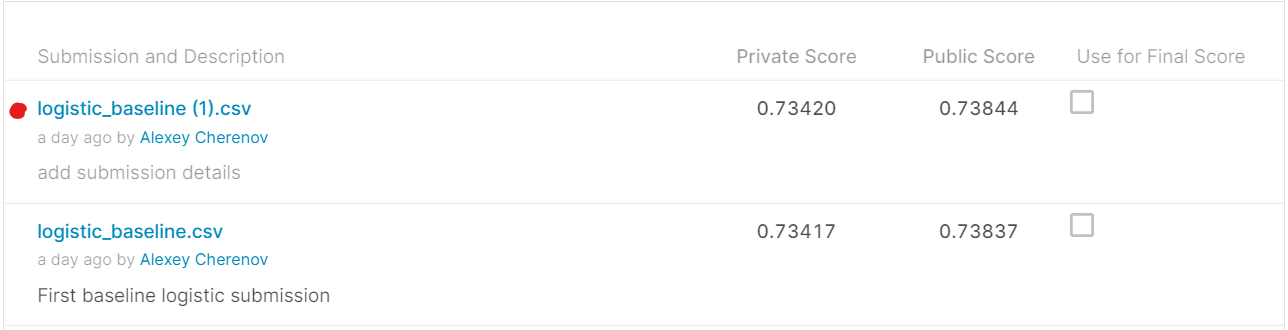

Верхнее решение отличается от нижнего отсуствием колонки с айдишниками наблюдений. Очень странно, насколько отличается итоговая метрика на кросс-валидации (0.86 с крайне низкой дисперсией между фолдами) и итоговой на Каггле (0.73-0.74). По всей видимости, в тестовых данных распределение фичей отличается от тренировочных данных (мб больше пропусков, а мб сами выборки сгенерированы недостаточно случайно).

In [32]:
coefs = pd.DataFrame((model.coef_).transpose(), columns = ['coefs'])
coefs.index = test_copy.columns[1:]


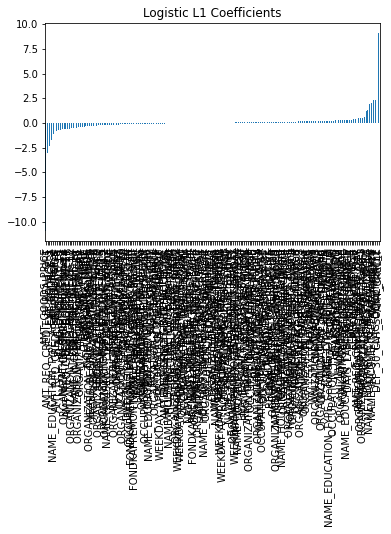

In [33]:
coefs = coefs.sort_values(by = ['coefs'])
coefs.loc[(coefs['coefs'] != 0),'coefs'].plot.bar(title = 'Logistic L1 Coefficients')

In [34]:
coefs

,coefs
AMT_GOODS_PRICE,-1.092154e+01
AMT_REQ_CREDIT_BUREAU_QRT,-3.049353e+00
EXT_SOURCE_3,-2.371439e+00
EXT_SOURCE_2,-1.735650e+00
NAME_EDUCATION_TYPE_Academic degree,-1.098661e+00
EXT_SOURCE_1,-1.065496e+00
AMT_REQ_CREDIT_BUREAU_MON,-8.459997e-01
FLAG_DOCUMENT_13,-7.337699e-01
FLAG_DOCUMENT_15,-6.939711e-01
NAME_INCOME_TYPE_Student,-6.590547e-01


In [35]:
bureau.head(50)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.000,0.000,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.000,171342.000,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.500,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.50,0,2700000.000,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.00,0,180000.000,71017.380,108982.620,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.00,0,42103.800,42103.800,0.000,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.00,0,76878.450,0.000,0.000,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.00,0,103007.700,0.000,0.000,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.00,0,4500.000,0.000,0.000,0.0,Credit card,-690,NaN


In [96]:
bureau['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [37]:
bureau = bureau[bureau['CREDIT_CURRENCY'] == 'currency 1']

In [38]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [97]:
actives = bureau[bureau['CREDIT_ACTIVE'] == 'Active']

In [98]:
actives['Outstanding'] = (actives['DAYS_CREDIT_ENDDATE'])/(actives['DAYS_CREDIT_ENDDATE'] - actives['DAYS_CREDIT'])*actives['AMT_CREDIT_SUM']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
print(actives['Outstanding'].isnull().sum(), sum(actives['Outstanding'] > 0))

72505 456872


In [100]:
actives = actives[actives['Outstanding'] > 0]

In [43]:
train = train_copy
test = test_copy

In [101]:
actives = actives[['SK_ID_CURR', 'Outstanding']].groupby('SK_ID_CURR').agg('sum')

In [102]:
actives = actives.reset_index()
actives.head()

,SK_ID_CURR,Outstanding
0,100001,670991.637150
1,100002,192645.444566
2,100003,540592.755214
3,100005,535238.768458
4,100008,229585.475410


In [163]:
print(train.shape, test.shape)
train = pd.merge(train, actives, on='SK_ID_CURR', how = 'left')
test = pd.merge(test, actives, on='SK_ID_CURR', how = 'left')
print(train.shape, test.shape)

(307511, 243) (48744, 243)
(307511, 244) (48744, 244)


Таким образом, мы просуммировали объем открытых в других данных кредитов (вернее посчитали остаток средств к уплате исходя из линейной аммортизации кредита, поскольку далеко не для всех кредитов были данные об оставшейся задолженности).

Теперь поделим имеющиеся у нас количественные значения на размер дохода, чтобы получить более информативные относительные факторы.

In [47]:
train_copy = train.copy()
features = list(train.columns)
test_copy = test.copy()

train.pop('SK_ID_CURR')
test.pop('SK_ID_CURR')
# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train[train.columns] = imputer.transform(train)
test[test.columns] = imputer.transform(test)

print(train.shape, test.shape)
train['AMT_CREDIT'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['AMT_ANNUITY'] = train['AMT_ANNUITY'] * 12 / train['AMT_INCOME_TOTAL']
train['AMT_GOODS_PRICE'] = train['AMT_GOODS_PRICE'] / train['AMT_INCOME_TOTAL']
train['Outstanding'] = train['Outstanding'] / train['AMT_INCOME_TOTAL']
test['AMT_CREDIT'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['AMT_ANNUITY'] = test['AMT_ANNUITY'] * 12 / test['AMT_INCOME_TOTAL']
test['AMT_GOODS_PRICE'] = test['AMT_GOODS_PRICE'] / test['AMT_INCOME_TOTAL']
test['Outstanding'] = test['Outstanding'] / test['AMT_INCOME_TOTAL']
train.pop('AMT_INCOME_TOTAL')
test.pop('AMT_INCOME_TOTAL')
print(train.shape, test.shape)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

(307511, 243) (48744, 243)
(307511, 242) (48744, 242)


In [48]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)


print(kf)
model = LogisticRegression(penalty = 'l1', solver = 'saga')
roc_auc_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train[train_index,:], train[test_index,:]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(X_train, y_train)
    #print("model.coef_: ", model.coef_)
    predict = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("Mean Roc-Auc for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("Std Roc-Auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

KFold(n_splits=5, random_state=None, shuffle=False)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0 0.7453766692874071


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1 0.7448753047160559


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2 0.7385484301652272


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


3 0.7473876778640428
4 0.7494084672632132
Mean Roc-Auc for 5-fold: 0.7451193098591893
Std Roc-Auc for 5-fold: 0.0036563532920008625


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
model = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000)
model.fit(train, target)
log_reg_pred = model.predict_proba(test)[:, 1]
roc_auc_score(target, model.predict_proba(train)[:, 1])

0.7483180353643799

In [50]:
submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred
submit.to_csv('logistic_baseline.csv', index = False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


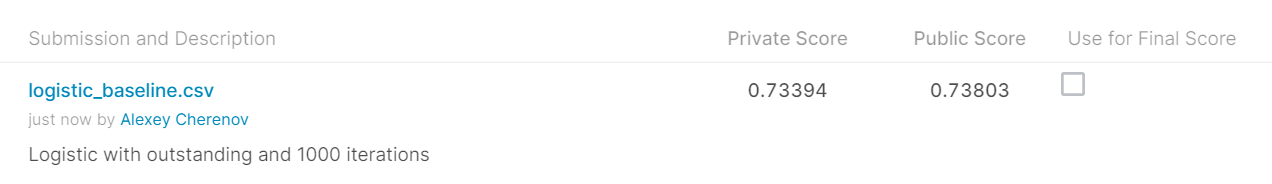

Добавление нового фактора и выражение количественных переменных через отношение к доходу не привело к улучшению. Попробуем вернуть первоначальный вид переменных.

In [51]:
test = test_copy
train = train_copy

In [52]:
train_copy = train.copy()
features = list(train.columns)
test_copy = test.copy()

train.pop('SK_ID_CURR')
test.pop('SK_ID_CURR')
# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train[train.columns] = imputer.transform(train)
test[test.columns] = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [53]:
model = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 300)
model.fit(train, target)
log_reg_pred = model.predict_proba(test)[:, 1]
roc_auc_score(target, model.predict_proba(train)[:, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7490834444508971

In [54]:
submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred
submit.to_csv('logistic_baseline.csv', index = False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


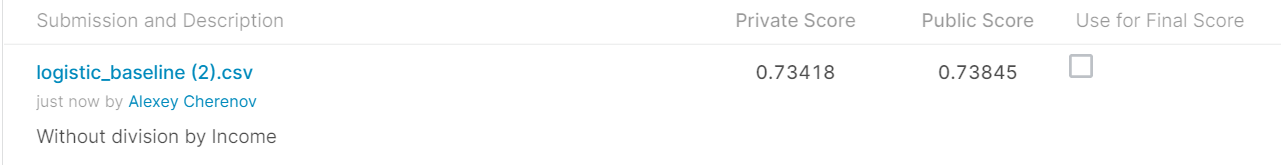

Как можно заметить, включение нового фактора не сильно влияет на качество модели. Вполне вероятно, влияние факторов связанных с кредитоспособностью заемщика уже учтено в метриках EXT, поэтому дальнейшее улучшение результата логистической регрессии возможно за счет более глубокого препроцессинга данных.

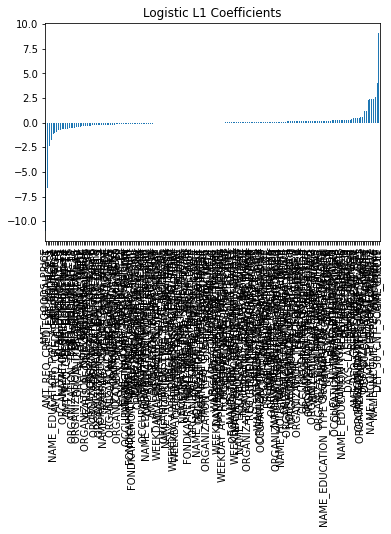

In [55]:
coefs = pd.DataFrame((model.coef_).transpose(), columns = ['coefs'])
coefs.index = test_copy.columns[1:]

coefs = coefs.sort_values(by = ['coefs'])
coefs.loc[(coefs['coefs'] != 0),'coefs'].plot.bar(title = 'Logistic L1 Coefficients')

In [56]:
coefs

,coefs
AMT_GOODS_PRICE,-1.094948e+01
AMT_REQ_CREDIT_BUREAU_QRT,-6.607922e+00
EXT_SOURCE_3,-2.360854e+00
EXT_SOURCE_2,-1.738955e+00
NAME_EDUCATION_TYPE_Academic degree,-1.107375e+00
EXT_SOURCE_1,-1.068332e+00
AMT_REQ_CREDIT_BUREAU_MON,-8.920456e-01
FLAG_DOCUMENT_13,-7.394804e-01
FLAG_DOCUMENT_15,-6.937347e-01
NAME_INCOME_TYPE_Student,-6.667020e-01


Странно, что наиболее значимыми факторами оказались AMT_CREDIT и GOODS_PRICE, более того, эффект диаметрально противоположный. Возможно, дело в том, что GOODS_PRICE является прокси для залоговой стоимости (в случае автокредитов и ипотеки, например). 

In [58]:
train_copy.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,...,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade:

In [61]:
train_copy['AMT_CREDIT'].isnull().sum(), train_copy['AMT_GOODS_PRICE'].isnull().sum()

(0, 278)

In [63]:
test_copy['AMT_CREDIT'].isnull().sum(), test_copy['AMT_GOODS_PRICE'].isnull().sum()

(0, 0)

In [64]:
train_copy['AMT_CREDIT'].corr(train_copy['AMT_GOODS_PRICE']), test_copy['AMT_CREDIT'].corr(test_copy['AMT_GOODS_PRICE'])

(0.9869683054221497, 0.9880559030290801)

Занятно, что они практически абсолютно скореллированы (вернее это предсказуемо, но по доли пропусков выходит, что все кредиты потребительские, и нужды в двух абсолютно идентичных факторах нет). Поскольку в AMT_CREDIT пропусков нет, оставим его.

In [136]:
train = train_copy
test = test_copy
train.pop('AMT_GOODS_PRICE')
test.pop('AMT_GOODS_PRICE')

0         450000.0
1         180000.0
2         630000.0
3        1575000.0
4         625500.0
           ...    
48739     270000.0
48740     495000.0
48741     315000.0
48742     450000.0
48743     270000.0
Name: AMT_GOODS_PRICE, Length: 48744, dtype: float64

Попробуем оценить модель заново.

In [139]:
features = list(train.columns)


train.pop('SK_ID_CURR')
test.pop('SK_ID_CURR')
# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train[train.columns] = imputer.transform(train)
test[test.columns] = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [140]:
model = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 300)
model.fit(train, target)
log_reg_pred = model.predict_proba(test)[:, 1]
roc_auc_score(target, model.predict_proba(train)[:, 1])


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.746362667622082

In [141]:
submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred
submit.to_csv('logistic_baseline.csv', index = False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


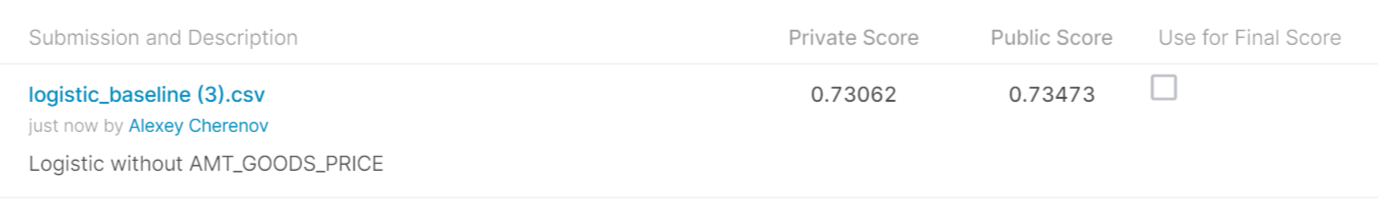


Как ни странно, избавление от фактора, имеющего практически 100%-ую корреляцию с первоначальным не привело к улучшению результата. Попробуем выбрать оптимальную модель из Lasso/Ridge/ElasticNet.

In [143]:
train = train_copy.copy()
test = test_copy.copy()

In [164]:
train_copy = train.copy()
test_copy = test.copy()
features = list(train.columns)


train.pop('SK_ID_CURR')
test.pop('SK_ID_CURR')
# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train[train.columns] = imputer.transform(train)
test[test.columns] = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [165]:
model1 = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 300)
model1.fit(train, target)
roc_auc_score(target, model1.predict_proba(train)[:, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7490667873789256

In [166]:
model2 = LogisticRegression(max_iter = 300)
model2.fit(train, target)
roc_auc_score(target, model2.predict_proba(train)[:, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7487033145477089

In [168]:
model3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 300, l1_ratio = 0.66)
model3.fit(train, target)
roc_auc_score(target, model3.predict_proba(train)[:, 1])

0.7489676258319531

In [174]:
pr = (model1.predict_proba(train)[:, 1] + model2.predict_proba(train)[:, 1] + model3.predict_proba(train)[:, 1])/3

In [175]:
roc_auc_score(target, pr)

0.7489660567948814

In [176]:
log_reg_pred = (model1.predict_proba(test)[:, 1] + model2.predict_proba(test)[:, 1] + model3.predict_proba(test)[:, 1])/3

submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred
submit.to_csv('logistic_baseline.csv', index = False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


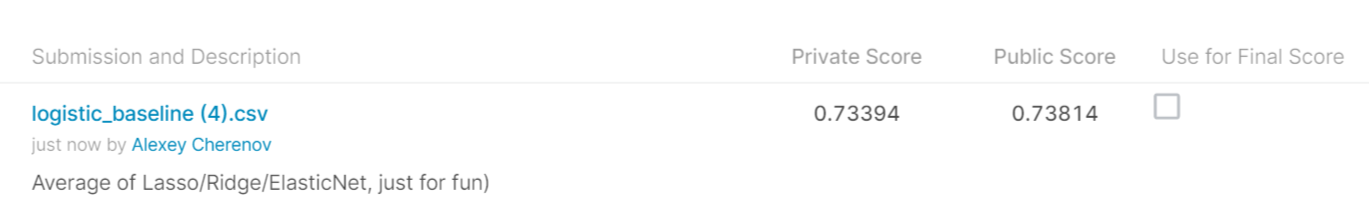
Predictably, linear combination of Lasso/Ridge/ElasticNet do not improve predictive power of the model.

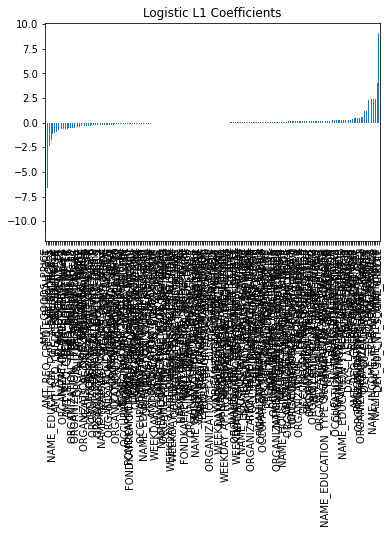

In [178]:
coefs = pd.DataFrame((model1.coef_).transpose(), columns = ['coefs'])
coefs.index = test_copy.columns[1:]

coefs = coefs.sort_values(by = ['coefs'])
coefs.loc[(coefs['coefs'] != 0),'coefs'].plot.bar(title = 'Logistic L1 Coefficients')

In [181]:
coefs = coefs[coefs['coefs']!= 0]

In [185]:
labels = coefs.index


In [187]:
train = train_copy[labels].copy()
test = test_copy[labels].copy()

In [189]:
features = list(train.columns)

# Impute missing values with median, since we use Logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Let's use min-max scaling as well
scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)
train[train.columns] = imputer.transform(train)
test[test.columns] = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [191]:
model1 = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 500)
model1.fit(train, target)
roc_auc_score(target, model1.predict_proba(train)[:, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7491135425747082

In [192]:
log_reg_pred = model1.predict_proba(test)[:, 1]

submit = test_copy[['SK_ID_CURR']]
submit.loc[:,'TARGET'] = log_reg_pred
submit.to_csv('logistic_baseline.csv', index = False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


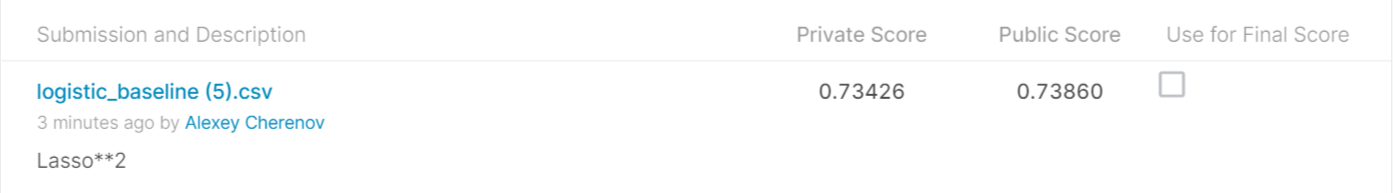

Seems like we cannot reach better fit with Logistic regressio without generation of additional features and more data preprocessing.

In [194]:
ctrain = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')

In [195]:
ctrain = ctrain.fillna('missing')

In [205]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        if d['IV'].sum() >= 0.02:
            if d['IV'].sum() <= 0.1:
                print(ivars, '  weak  ', d['IV'].sum())
            elif d['IV'].sum() <= 0.3:
                print(ivars, '  medium  ', d['IV'].sum())
            elif d['IV'].sum() <= 0.5:
                print(ivars, '  strong  ', d['IV'].sum())
            else:
                print(ivars, '  suspicious  ', d['IV'].sum())
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


iv, woe = iv_woe(data = ctrain, target = 'TARGET', bins=10)


CODE_GENDER   weak   0.03859923283250842
AMT_CREDIT   weak   0.045072642208560075
AMT_ANNUITY   suspicious   0.6779836497376167
AMT_GOODS_PRICE   medium   0.1510195873872817
NAME_INCOME_TYPE   weak   0.05838118835908135
NAME_EDUCATION_TYPE   weak   0.05083554290147044
NAME_FAMILY_STATUS   weak   0.021711498265341016
REGION_POPULATION_RELATIVE   weak   0.03509435647276245
DAYS_BIRTH   weak   0.08419979394489374
DAYS_EMPLOYED   medium   0.10126293939856007
DAYS_REGISTRATION   weak   0.02687179989195084
DAYS_ID_PUBLISH   weak   0.03845349628332896
OWN_CAR_AGE   weak   0.02528790209275592
FLAG_EMP_PHONE   weak   0.032907128220936985
OCCUPATION_TYPE   weak   0.08286467380459817
REGION_RATING_CLIENT   weak   0.04831690185425046
REGION_RATING_CLIENT_W_CITY   weak   0.05120149755009072
REG_CITY_NOT_LIVE_CITY   weak   0.022298689071670597
REG_CITY_NOT_WORK_CITY   weak   0.03220724394929676
ORGANIZATION_TYPE   weak   0.07336774725876796
EXT_SOURCE_1   suspicious   3.9189238347534303
EXT_SOURCE_2

Overall, Information Value statistics seem to correlate with findings of Lasso-regularized Logit estimation.